# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [237]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [238]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [239]:
# Print dataset
print(dataset)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [240]:
# Print dataset shape
dataset.shape

(150, 5)

In [241]:
# Print column names
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [242]:
# Drop na
dataset = dataset.dropna()

3. Encoding the class label categorical column: from string to num


In [243]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset['Flower_encoded'] = dataset['Flower'].map(mapping)

#Visualize the dataset
print(dataset.head())


   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   Flower_encoded  
0               0  
1               0  
2               0  
3               0  
4               0  


Now the label/category is numeric


4. Discard columns that won't be used


In [244]:
# Drop out non necesary columns
dataset_clean = dataset.drop(['Flower'], axis=1)


5. Scatter plot of the data

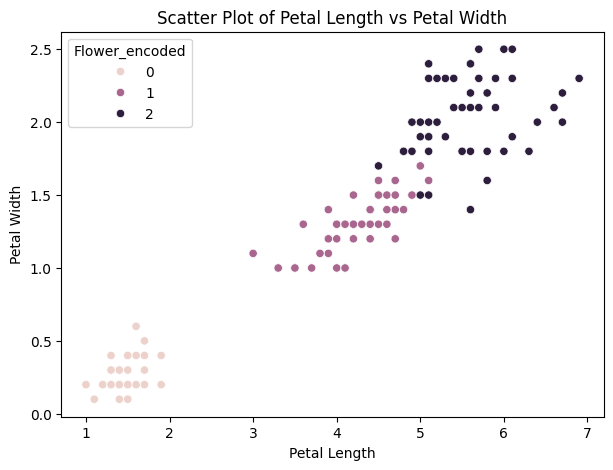

In [245]:
# Scatter plot of Petal_Length vs Petal_Width

plt.figure(figsize=(7, 5))
sns.scatterplot(x="Petal_Length", y="Petal_Width", hue="Flower_encoded", data=dataset_clean)
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


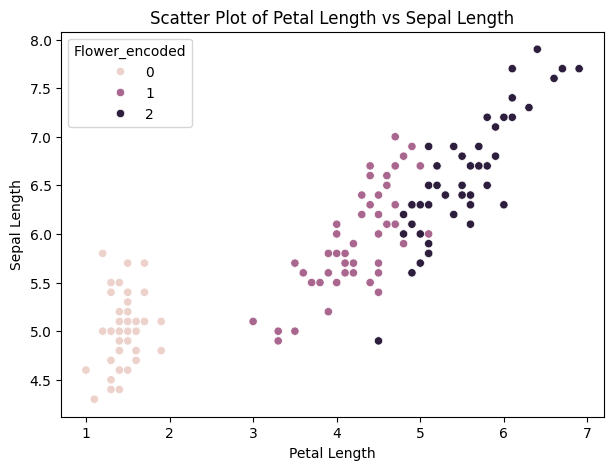

In [246]:
# Scatter plot of Petal_Length vs Sepal_Length

plt.figure(figsize=(7, 5))
sns.scatterplot(x="Petal_Length", y="Sepal_Length", hue="Flower_encoded", data=dataset_clean)
plt.title("Scatter Plot of Petal Length vs Sepal Length")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.show()


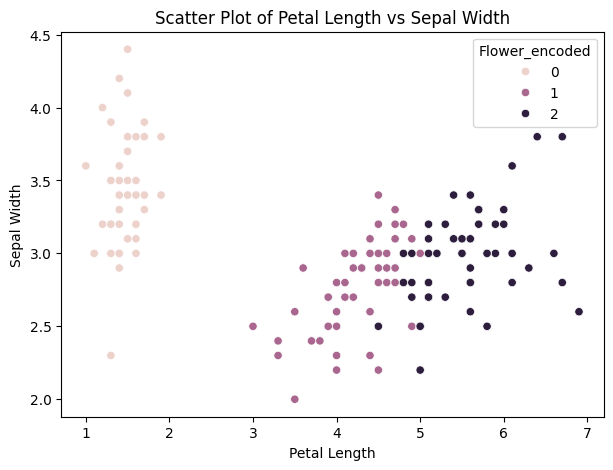

In [247]:
# Scatter plot of Petal_Length vs Sepal_Width

plt.figure(figsize=(7, 5))
sns.scatterplot(x="Petal_Length", y="Sepal_Width", hue="Flower_encoded", data=dataset_clean)
plt.title("Scatter Plot of Petal Length vs Sepal Width")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.show()


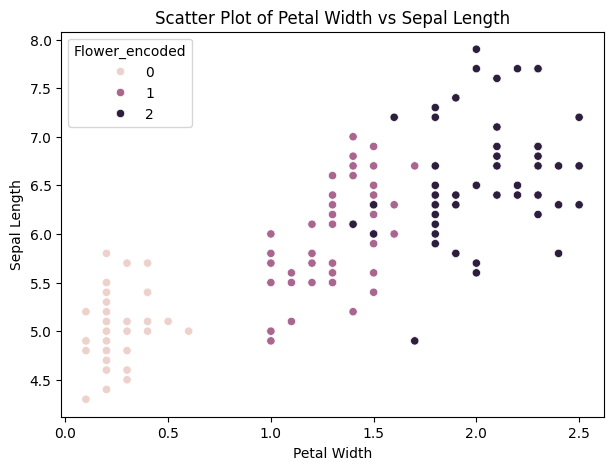

In [248]:
# Scatter plot of Petal_Width vs Sepal_Length

plt.figure(figsize=(7, 5))
sns.scatterplot(x="Petal_Width", y="Sepal_Length", hue="Flower_encoded", data=dataset_clean)
plt.title("Scatter Plot of Petal Width vs Sepal Length")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()

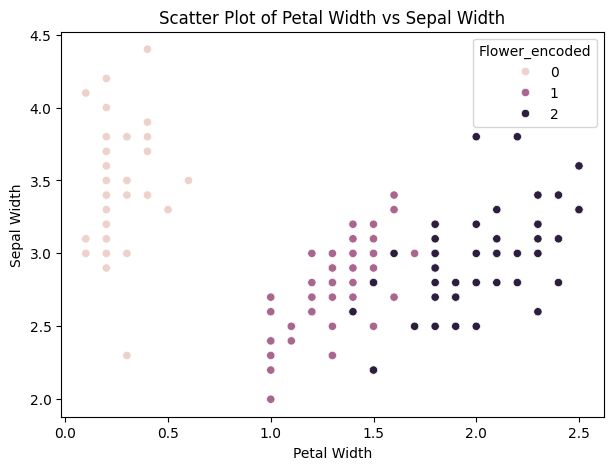

In [249]:
# Scatter plot of Petal_Width vs Sepal_Width

plt.figure(figsize=(7, 5))
sns.scatterplot(x="Petal_Width", y="Sepal_Width", hue="Flower_encoded", data=dataset_clean)
plt.title("Scatter Plot of Petal Width vs Sepal Width")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.show()

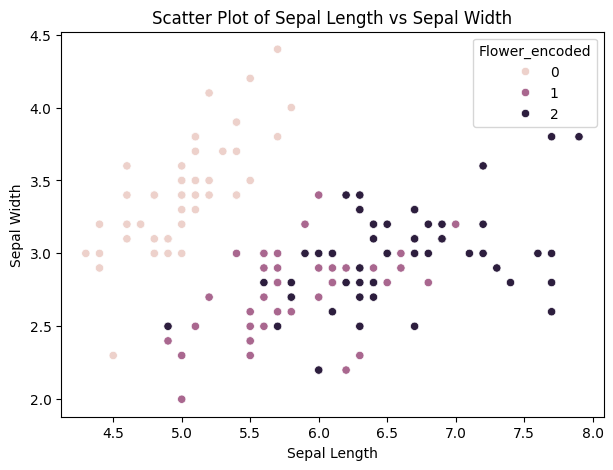

In [250]:
# Scatter plot of Sepal_Length vs Sepal_Width

plt.figure(figsize=(7, 5))
sns.scatterplot(x="Sepal_Length", y="Sepal_Width", hue="Flower_encoded", data=dataset_clean)
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


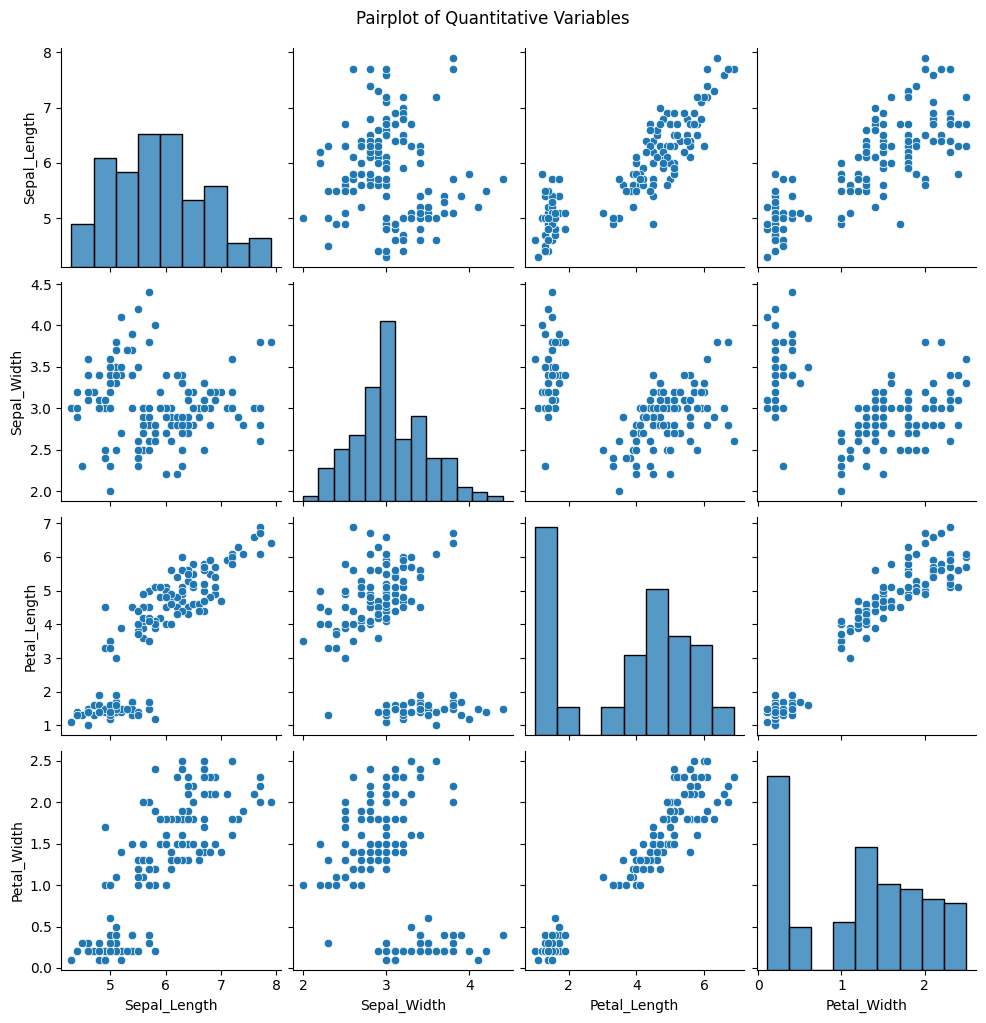

In [251]:
# Pairplot: Scatterplot of all variables (not the flower type)
quantitative_cols = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]
sns.pairplot(dataset_clean[quantitative_cols])
plt.suptitle("Pairplot of Quantitative Variables", y=1.02)
plt.show()


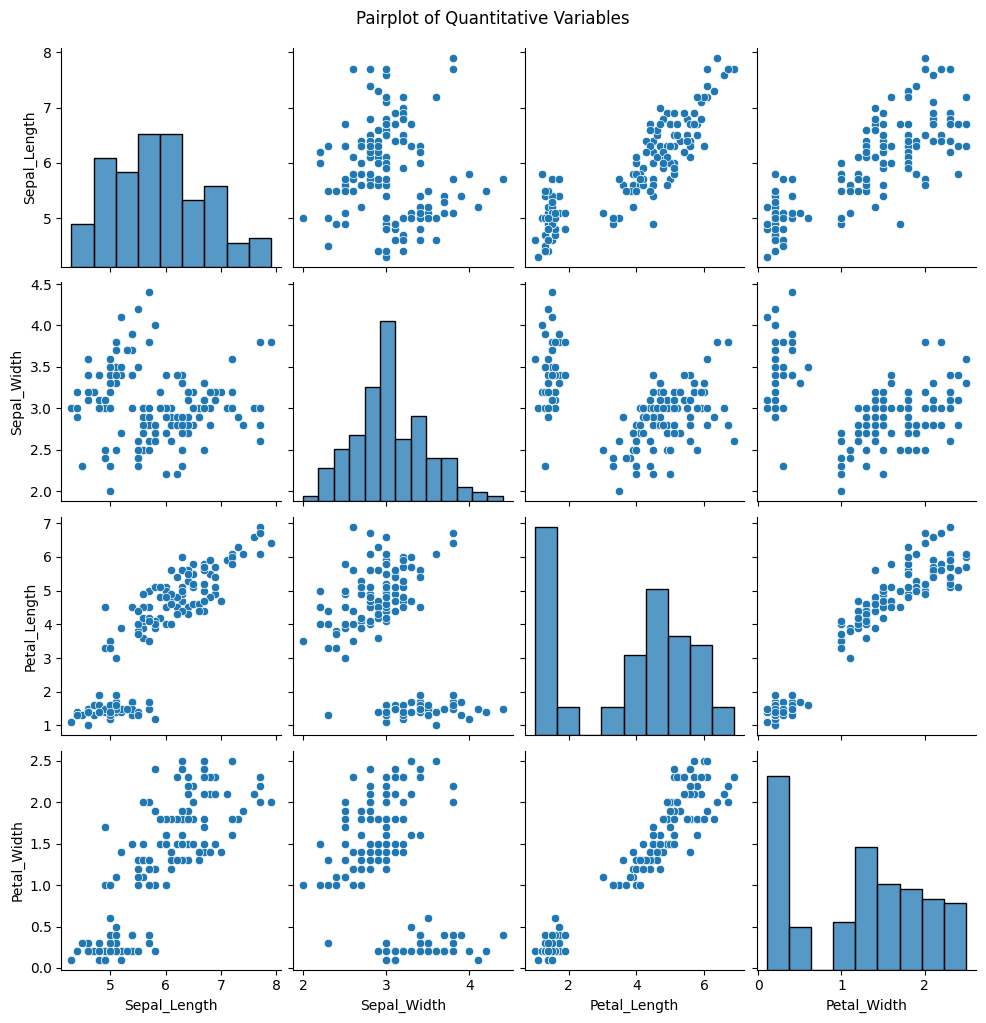

In [252]:
# Pairplot: Scatterplot of all variables (not the flower type)

quantitative_cols = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]
sns.pairplot(dataset_clean[quantitative_cols])
plt.suptitle("Pairplot of Quantitative Variables", y=1.02)
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [253]:
# Get dataframes for each real cluster

# Get DataFrames for each real cluster based on the encoded flower type
cluster_setosa = dataset_clean[dataset_clean['Flower_encoded'] == 0]
cluster_versicolor = dataset_clean[dataset_clean['Flower_encoded'] == 1]
cluster_virginica = dataset_clean[dataset_clean['Flower_encoded'] == 2]

print("Setosa", cluster_setosa.head())
print("Versicolor", cluster_versicolor.head())
print("Virginica", cluster_virginica.head())


Setosa    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower_encoded
0           5.1          3.5           1.4          0.2               0
1           4.9          3.0           1.4          0.2               0
2           4.7          3.2           1.3          0.2               0
3           4.6          3.1           1.5          0.2               0
4           5.0          3.6           1.4          0.2               0
Versicolor     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower_encoded
50           7.0          3.2           4.7          1.4               1
51           6.4          3.2           4.5          1.5               1
52           6.9          3.1           4.9          1.5               1
53           5.5          2.3           4.0          1.3               1
54           6.5          2.8           4.6          1.5               1
Virginica      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower_encoded
100           6.3          3

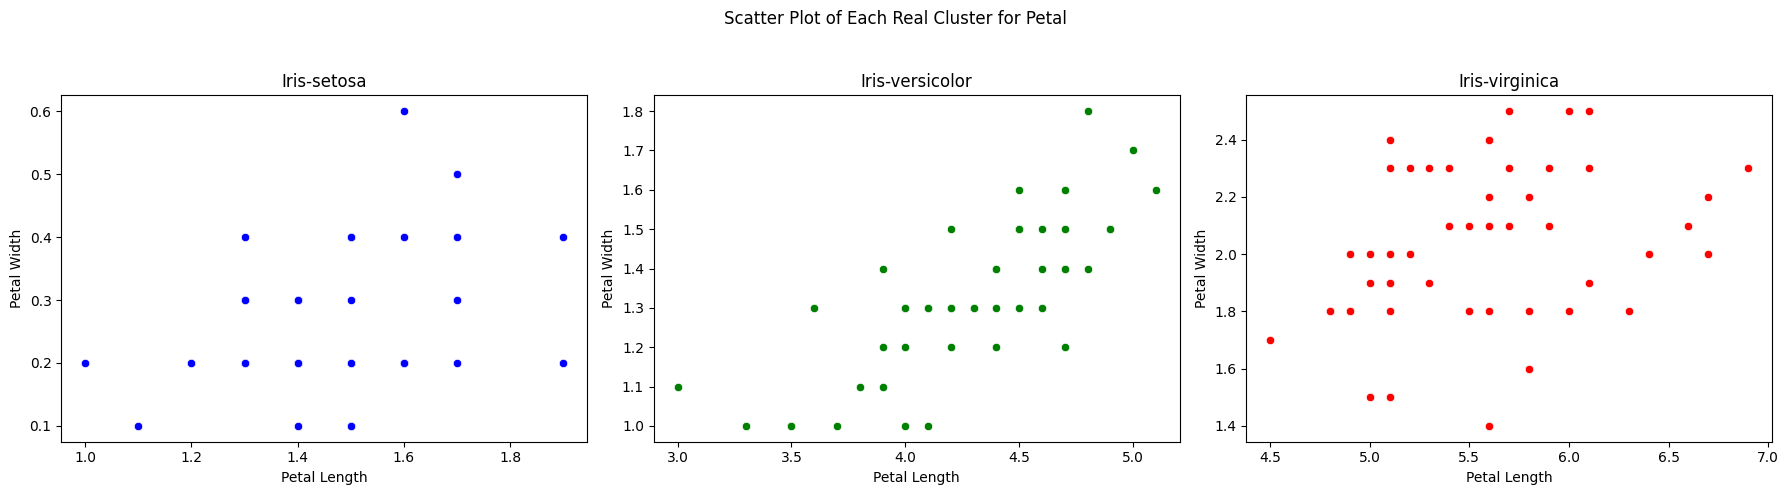

In [254]:
# Create subplots for each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# iris setosa
sns.scatterplot(ax=axes[0], x='Petal_Length', y='Petal_Width', data=cluster_setosa, color='blue')
axes[0].set_title('Iris-setosa')
axes[0].set_xlabel('Petal Length')
axes[0].set_ylabel('Petal Width')

# iris versi
sns.scatterplot(ax=axes[1], x='Petal_Length', y='Petal_Width', data=cluster_versicolor, color='green')
axes[1].set_title('Iris-versicolor')
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')

sns.scatterplot(ax=axes[2], x='Petal_Length', y='Petal_Width', data=cluster_virginica, color='red')
axes[2].set_title('Iris-virginica')
axes[2].set_xlabel('Petal Length')
axes[2].set_ylabel('Petal Width')

plt.suptitle("Scatter Plot of Each Real Cluster for Petal")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


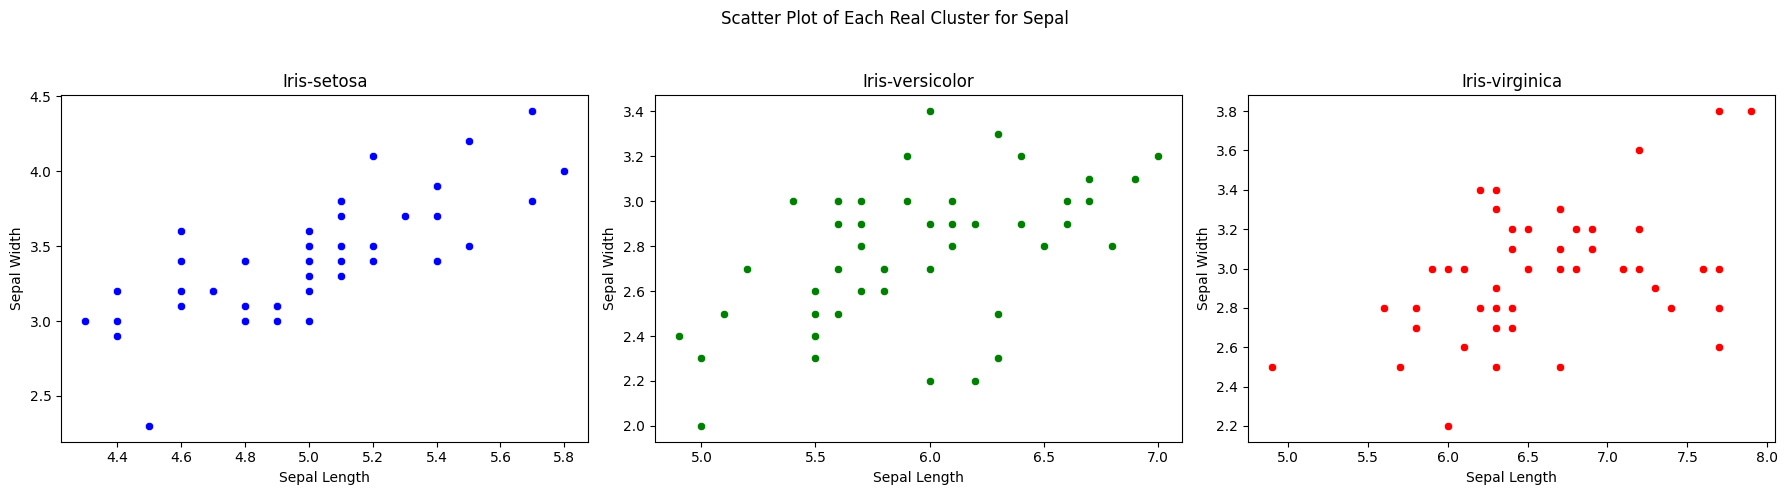

In [255]:
# Scatter plot of each real cluster for Sepal

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# iris setosa
sns.scatterplot(ax=axes[0], x='Sepal_Length', y='Sepal_Width', data=cluster_setosa, color='blue')
axes[0].set_title('Iris-setosa')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')

# iris versi
sns.scatterplot(ax=axes[1], x='Sepal_Length', y='Sepal_Width', data=cluster_versicolor, color='green')
axes[1].set_title('Iris-versicolor')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')

# iris virg
sns.scatterplot(ax=axes[2], x='Sepal_Length', y='Sepal_Width', data=cluster_virginica, color='red')
axes[2].set_title('Iris-virginica')
axes[2].set_xlabel('Sepal Length')
axes[2].set_ylabel('Sepal Width')

plt.suptitle("Scatter Plot of Each Real Cluster for Sepal")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [256]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y = dataset["Flower_encoded"].values


In [257]:
# Understand the data X
print("Data X:")
print("Shape:", X.shape)  # Shape of the features array
print("Type:", type(X))
print("First 5 rows:\n", X[:5])

Data X:
Shape: (150, 4)
Type: <class 'numpy.ndarray'>
First 5 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [258]:
# Understand the data y
print("Data Y:")
print("Shape:", Y.shape)  # Shape of the features array
print("Type:", type(Y))
print("First 5 columns:\n", Y[:5])

Data Y:
Shape: (150,)
Type: <class 'numpy.ndarray'>
First 5 columns:
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [259]:
# Calculate the number of observations in the dataset
num_observations = dataset.shape[0]
print(num_observations)


150


In [260]:
# Calculate the number of observations for class 0
num_class1 = dataset[dataset["Flower_encoded"] == 1].shape[0]
print("Number of observations for class 1:", num_class1)


Number of observations for class 1: 50


In [261]:
# Calculate the number of observations for class 1
num_class2 = dataset[dataset["Flower_encoded"] == 2].shape[0]
print("Number of observations for class 2:", num_class2)

Number of observations for class 2: 50


In [262]:
# Calculate the number of observations for class 2
num_class2 = dataset[dataset["Flower_encoded"] == 2].shape[0]
print("Number of observations for class 2:", num_class2)

Number of observations for class 2: 50


# Train a classifier

## Train the classification model

In [263]:
# Import sklearn linear_model
from sklearn import linear_model

# Initialize the classifier
log_reg = linear_model.LogisticRegression()


# Fit the model to the training data
log_reg.fit(X, Y)



LogisticRegression()

## Predict the class of a new observation

In [264]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [265]:
# Make the prediction using xnew
xnew_prediction = log_reg.predict(xnew)

# Get the predicted class
class_predicted = xnew_prediction[0]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [266]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_all = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.33, random_state=42)

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# all features
clf_lr_all = LogisticRegression(max_iter=200)
clf_lr_all.fit(x_train_all, y_train_all)
y_pred_all = clf_lr_all.predict(x_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Accuracy with all four features (Logistic Regression):", accuracy_all)
print("Confusion Matrix (All Features):\n", confusion_matrix(y_test_all, y_pred_all, normalize='true'))

# Petal features
X_petal = dataset[["Petal_Length", "Petal_Width"]].values
x_train_petal, x_test_petal, y_train_petal, y_test_petal = train_test_split(X_petal, y, test_size=0.33, random_state=42)

clf_lr_petal = LogisticRegression(max_iter=200)
clf_lr_petal.fit(x_train_petal, y_train_petal)
y_pred_petal = clf_lr_petal.predict(x_test_petal)
accuracy_petal = accuracy_score(y_test_petal, y_pred_petal)
print("Accuracy with petal features (Logistic Regression):", accuracy_petal)
print("Confusion Matrix (Petal Features):\n", confusion_matrix(y_test_petal, y_pred_petal, normalize='true'))

# Sepal
X_sepal = dataset[["Sepal_Length", "Sepal_Width"]].values
x_train_sepal, x_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X_sepal, y, test_size=0.33, random_state=42)

clf_lr_sepal = LogisticRegression(max_iter=200)
clf_lr_sepal.fit(x_train_sepal, y_train_sepal)
y_pred_sepal = clf_lr_sepal.predict(x_test_sepal)
accuracy_sepal = accuracy_score(y_test_sepal, y_pred_sepal)
print("Accuracy with sepal features (Logistic Regression):", accuracy_sepal)
print("Confusion Matrix (Sepal Features):\n", confusion_matrix(y_test_sepal, y_pred_sepal, normalize='true'))


Accuracy with all four features (Logistic Regression): 1.0
Confusion Matrix (All Features):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Accuracy with petal features (Logistic Regression): 1.0
Confusion Matrix (Petal Features):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Accuracy with sepal features (Logistic Regression): 0.82
Confusion Matrix (Sepal Features):
 [[1.         0.         0.        ]
 [0.         0.53333333 0.46666667]
 [0.         0.125      0.875     ]]


Logistic Regression Accuracy: 1.0
Decision Tree Accuracy (all features): 0.98
Confusion Matrix (Decision Tree, All Features):
 [[1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.0625 0.9375]]


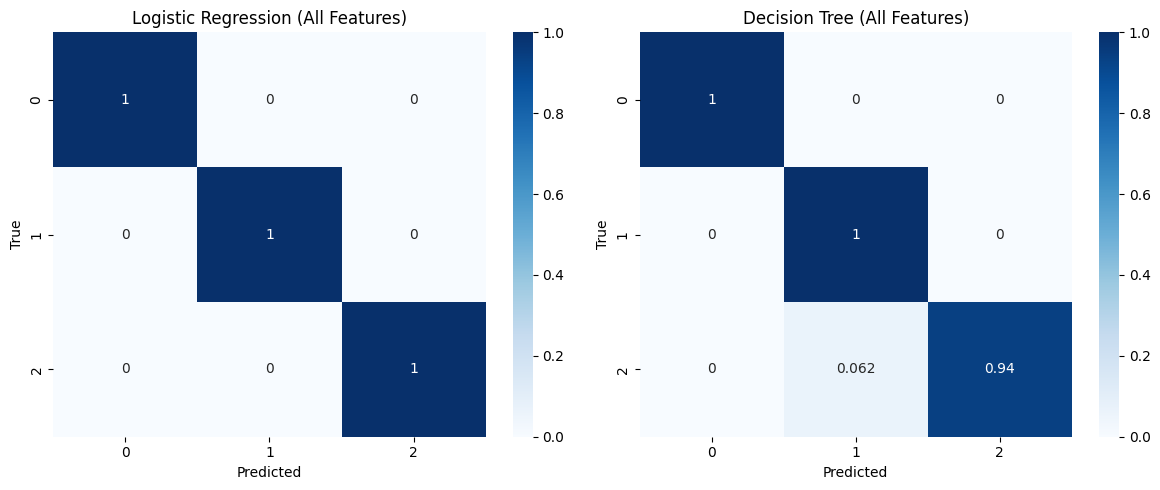

In [268]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression (already computed above)
print("Logistic Regression Accuracy:", accuracy_all)

# Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(x_train_all, y_train_all)
y_pred_dt = clf_dt.predict(x_test_all)
accuracy_dt = accuracy_score(y_test_all, y_pred_dt)
print("Decision Tree Accuracy (all features):", accuracy_dt)
print("Confusion Matrix (Decision Tree, All Features):\n", confusion_matrix(y_test_all, y_pred_dt, normalize='true'))

#conf matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test_all, y_pred_all, normalize='true'),
            annot=True, cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression (All Features)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test_all, y_pred_dt, normalize='true'),
            annot=True, cmap="Blues", ax=ax[1])
ax[1].set_title("Decision Tree (All Features)")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

plt.tight_layout()
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?
Four var: 1.0
Petal var: 1.0
Sepal var: 0.82
Four and Petal variables provide a perfect accuracy

2) Using the four variables, try with two classifiers. Which provides the best performance?
logistic: 1.0
decision tree: 0.98
Logistic Regression has a slight better performance